In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import glob 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img 
 
%matplotlib inline 

Using TensorFlow backend.


In [3]:
IMG_DIM = (150, 150) 
 
train_files = glob.glob('training_data/*') 
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img  
              in train_files] 
train_imgs = np.array(train_imgs) 
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in 
                train_files] 
 
validation_files = glob.glob('validation_data/*') 
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for 
                   img in validation_files] 
validation_imgs = np.array(validation_imgs) 
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in 
                     validation_files] 
 
print('Train dataset shape:', train_imgs.shape,  
      'tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) tValidation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


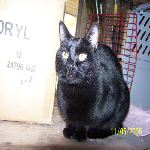

In [4]:
train_imgs_scaled = train_imgs.astype('float32') 
validation_imgs_scaled = validation_imgs.astype('float32') 
train_imgs_scaled /= 255 
validation_imgs_scaled /= 255 
 
# visualize a sample image 
print(train_imgs[0].shape) 
array_to_img(train_imgs[0]) 

In [5]:
batch_size = 30 
num_classes = 2 
epochs = 30 
input_shape = (150, 150, 3) 
 
# encode text category labels 
from sklearn.preprocessing import LabelEncoder 
 
le = LabelEncoder() 
le.fit(train_labels) 
train_labels_enc = le.transform(train_labels) 
validation_labels_enc = le.transform(validation_labels) 
 
print(train_labels[1495:1505], train_labels_enc[1495:1505]) 

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from keras.models import Sequential 
from keras import optimizers 
 
model = Sequential() 

# convolution and pooling layers 
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',  
                 input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(), 
              metrics=['accuracy']) 
 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc, 
validation_data=(validation_imgs_scaled,    
                 validation_labels_enc), 
                 batch_size=batch_size, 
                 epochs=epochs, 
                 verbose=1)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
t = f.suptitle('Basic CNN Performance', fontsize=12) 
f.subplots_adjust(top=0.85, wspace=0.3) 
 
epoch_list = list(range(1,31)) 
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5)) 
ax1.set_ylabel('Accuracy Value') 
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy') 
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best") 

In [ ]:
# model.save('cats_dogs_basic_cnn.h5')